In [16]:
%pip install seaborn
%pip install scikit-learn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
print('Setup Complete')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Setup Complete



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
df = pd.read_csv(r'C:\Users\uniqu\Downloads\Coding Project Datasets\Heart Attack Prediction Synthetic Data\heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [18]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [19]:
print(df.shape)

(8763, 26)


In [20]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [21]:
missing_values = df.isnull().sum()
print(missing_values.sum())

0


In [22]:
duplicates = df.duplicated()
print(duplicates.sum())

0


In [23]:
df.drop(columns=['Patient ID'], inplace=True)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


C:\Users\uniqu\AppData\Local\Temp\ipykernel_3888\4170296018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm", orient="h")
C:\Users\uniqu\AppData\Local\Temp\ipykernel_3888\4170296018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm", orient="h")
C:\Users\uniqu\AppData\Local\Temp\ipykernel_3888\4170296018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="coolwarm", orient="h")
C:\Users\uniqu\AppData\Local\Temp\ipykernel_3888\4170296018.py:6: FutureWarning: 


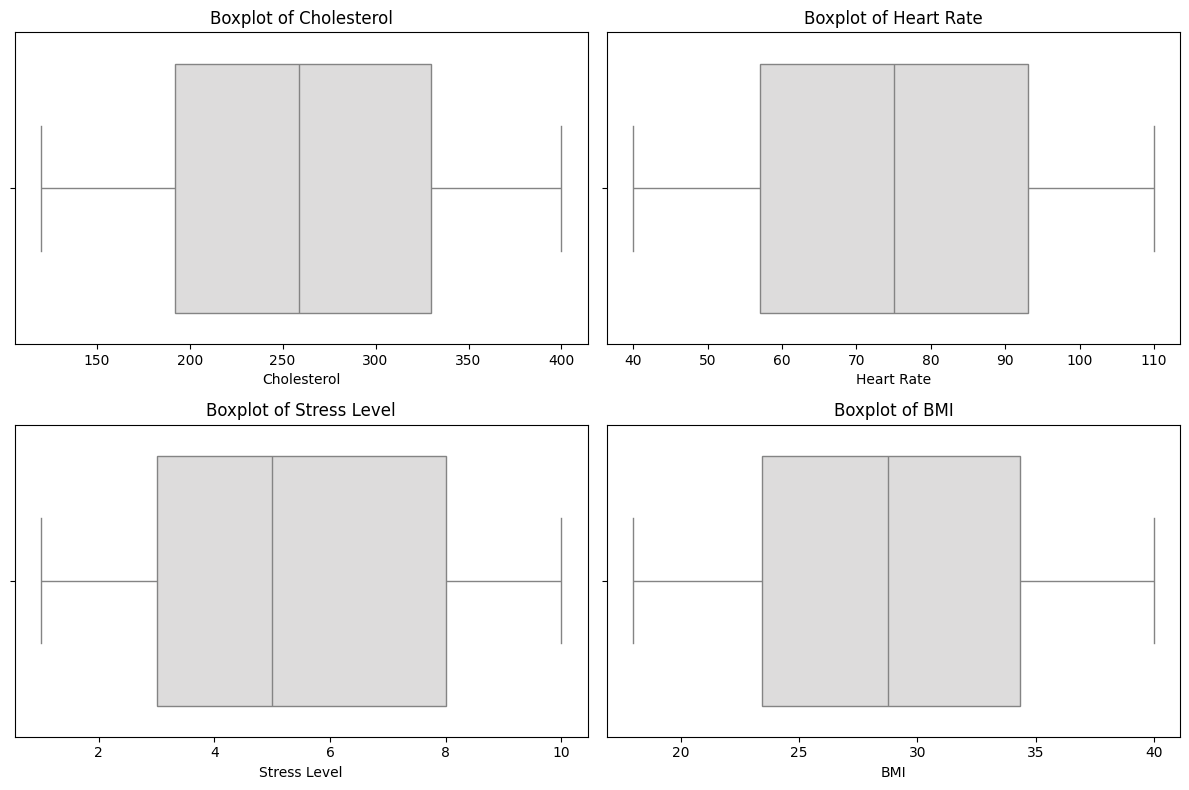

In [24]:
columns = ['Cholesterol', 'Heart Rate', 'Stress Level', 'BMI']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], palette="coolwarm", orient="h")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

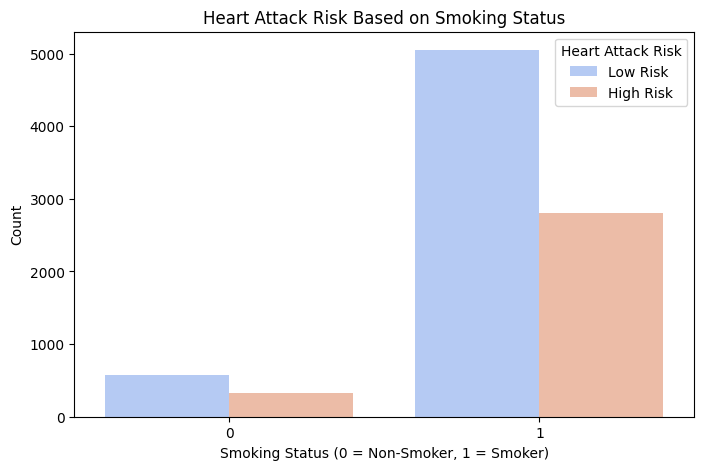

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Smoking", hue="Heart Attack Risk", palette="coolwarm")
plt.title("Heart Attack Risk Based on Smoking Status")
plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Count")
plt.legend(title="Heart Attack Risk", labels=["Low Risk", "High Risk"])
plt.show()

C:\Users\uniqu\AppData\Local\Temp\ipykernel_3888\451372432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Smoking", y="Cholesterol", palette="coolwarm", width=0.5)


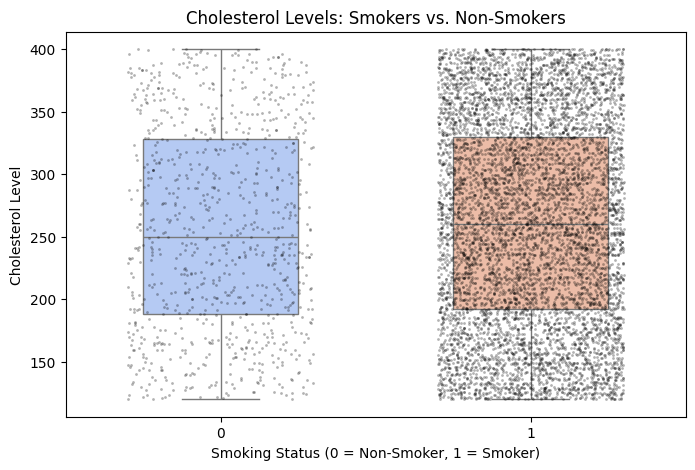

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Smoking", y="Cholesterol", palette="coolwarm", width=0.5)
sns.stripplot(data=df, x="Smoking", y="Cholesterol", color="black", size=2, jitter=0.3, alpha=0.3)
plt.title("Cholesterol Levels: Smokers vs. Non-Smokers")
plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Cholesterol Level")
plt.show()

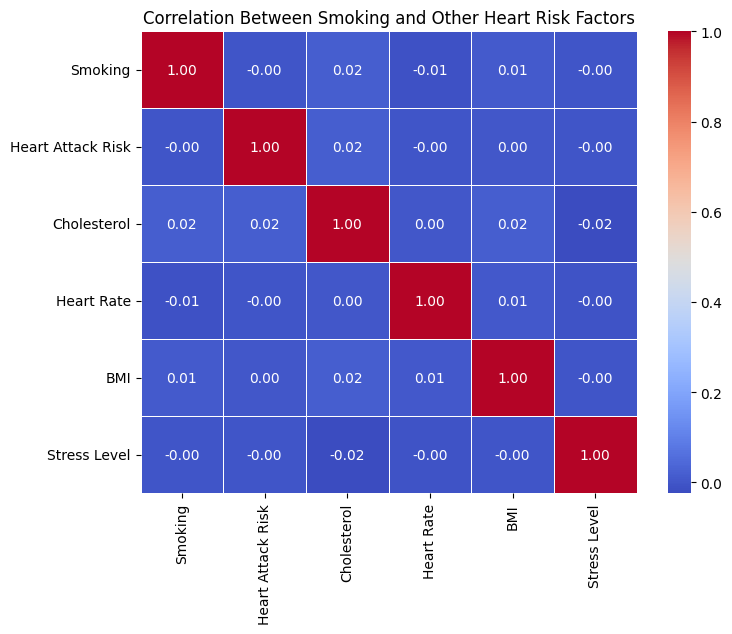

In [27]:
corr_features = ["Smoking", "Heart Attack Risk", "Cholesterol", "Heart Rate", "BMI", "Stress Level"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Smoking and Other Heart Risk Factors")
plt.show()

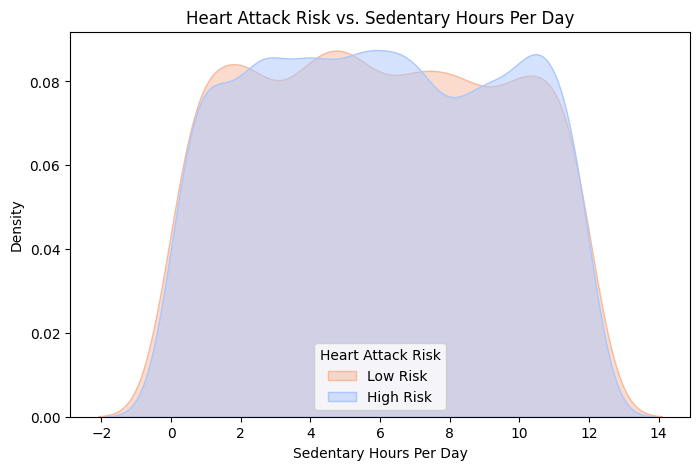

In [28]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Sedentary Hours Per Day", hue="Heart Attack Risk", fill=True, common_norm=False, palette="coolwarm", alpha=0.5)
plt.title("Heart Attack Risk vs. Sedentary Hours Per Day")
plt.xlabel("Sedentary Hours Per Day")
plt.ylabel("Density")
plt.legend(title="Heart Attack Risk", labels=["Low Risk", "High Risk"])
plt.show()